# Example Application of ```sampley```
A Jupyter notebook corresponding to the Example Application described in Syme et al., 2025, _sampley_: a Python package for sampling visual survey data.

## Set up

In [1]:
## Set up
from sampley import *  # import sampley
import_folder = './import/'  # set the import folder
export_folder = './export/'  # set the export folder

## Stage 1 - importing

### DataPoints

In [2]:
## Stage 1: import data
u_trackpoints = DataPoints.from_file(
    filepath=import_folder+'trackpoints.csv',  # filepath
    x_col='lon',  # name of column containing x coordinates (longitudes)
    y_col='lat',  # name of column containing y coordinates (latitudes)
    crs_import='EPSG:4326',  # CRS of the x and y coordinates
    crs_working='EPSG:32619',  # CRS to be used for processing
    datetime_col='datetime',  # name of column containing datetimes
    tz_import='UTC-05:00',  # timezone of the datetimes
    section_id_col='section_id'  # name of column containing section IDs
)

Success: file opened.
Success: X and Y coordinates parsed.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".
Success: datapoint IDs generated.


In [3]:
u_trackpoints.datapoints[:5]  # display the first five datapoints

,datapoint_id,section_id,geometry,datetime,individuals,bss
0,d0001,s001,POINT (580092.757 4742883.408),2019-01-25 10:18:13-05:00,NaN,2
1,d0002,s001,POINT (579997.135 4742882.297),2019-01-25 10:18:15-05:00,NaN,2
2,d0003,s001,POINT (579616.283 4742877.883),2019-01-25 10:18:23-05:00,NaN,2
3,d0004,s001,POINT (579166.78 4742872.701),2019-01-25 10:18:32-05:00,1.0,2
4,d0005,s001,POINT (578880.732 4742869.419),2019-01-25 10:18:38-05:00,NaN,2


### Sections

In [4]:
## Stage 1: make sections from datapoints
u_sections = Sections.from_datapoints(datapoints=u_trackpoints)

In [5]:
u_sections.sections  # display the sections

,section_id,geometry,datetime
0,s001,"LINESTRING (580092.757 4742883.408, 579997.135...",2019-01-25 10:18:13-05:00
1,s002,"LINESTRING (592927.566 4733678.432, 592818.466...",2019-01-30 14:32:57-05:00
2,s003,"LINESTRING (500383.195 4714750.316, 500765.569...",2019-03-02 12:43:27-05:00
3,s004,"LINESTRING (656499.299 4751214.73, 656509.418 ...",2019-03-05 11:21:16-05:00


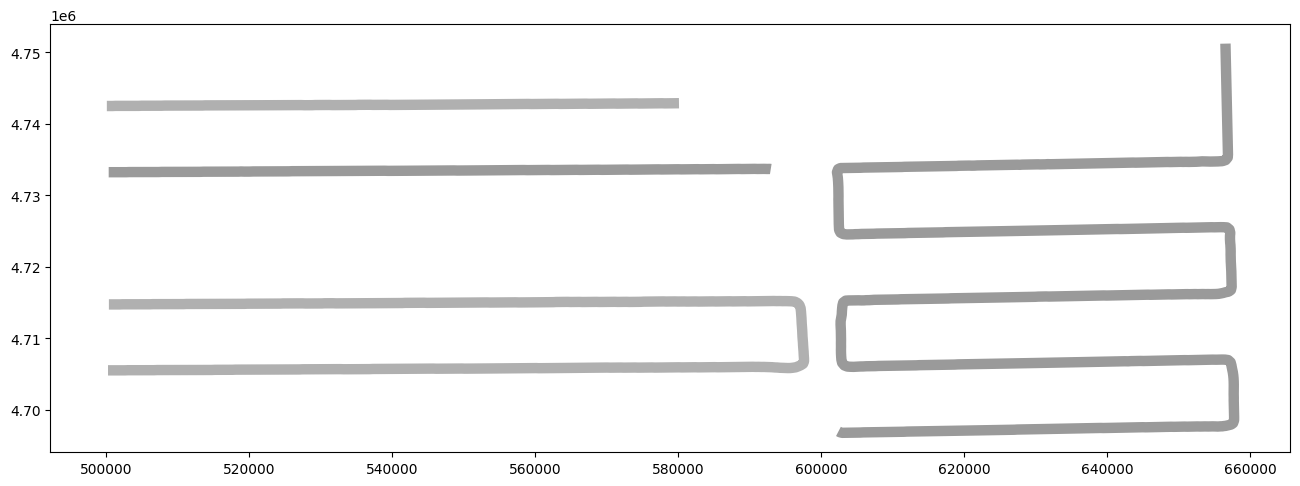

In [6]:
u_sections.plot()  # plot the sections

## Stage 2 - delimiting

### Segments - simple

In [7]:
## Stage 2: make segments with simple variation
u_segments_simple = Segments.delimit(
    sections=u_sections,  # enter the sections
    var='simple',  # set the variation to simple
    target=10000,  # set the target length to 10000 metres
    rand=True)  # set to randomise the location of the remainder

In [8]:
u_segments_simple.segments[:5]  # display the first five segments made with the simple variation

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end
0,s01-s10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.311 4742845.962),2019-01-25,s001,0.0,10000.00000
1,s02-s10000m,"LINESTRING (570094.222 4742829.916, 569917.081...",POINT (565094.73 4742799.725),2019-01-25,s001,10000.0,20000.00000
2,s03-s10000m,"LINESTRING (560095.148 4742773.163, 559864.339...",POINT (555095.521 4742749.119),2019-01-25,s001,20000.0,30000.00000
3,s04-s10000m,"LINESTRING (550095.667 4742710.935, 549838.842...",POINT (545095.787 4742676.383),2019-01-25,s001,30000.0,40000.00000
4,s05-s10000m,"LINESTRING (540095.882 4742645.456, 540091.24 ...",POINT (540093.561 4742645.442),2019-01-25,s001,40000.0,40004.64226


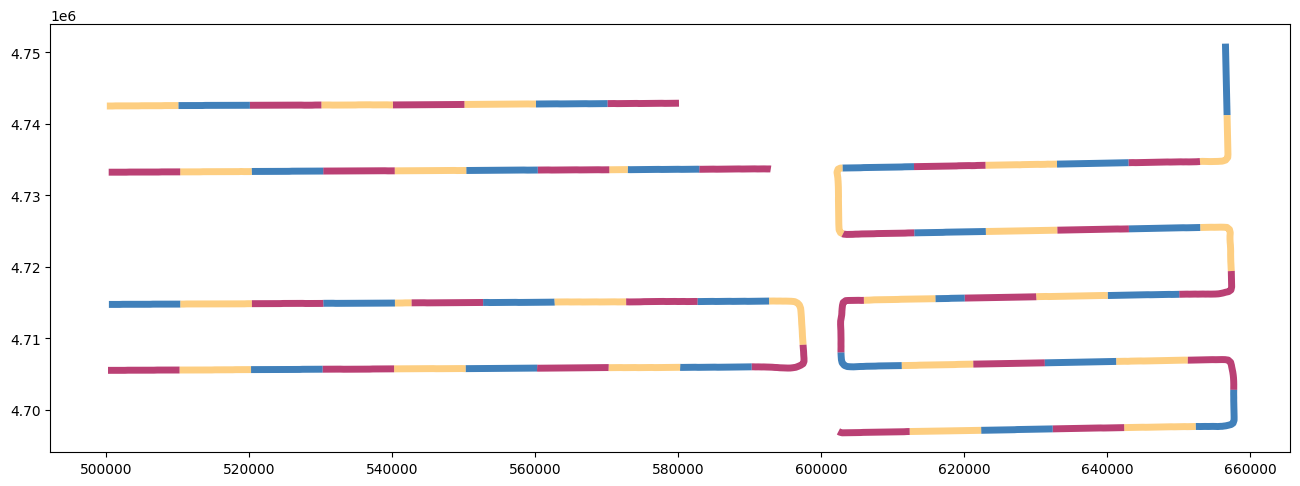

In [9]:
u_segments_simple.plot()  # plot the segments made with the simple variation

### Segments - redistribution

In [10]:
## Stage 2: make segments with redistribution variation
u_segments_redist = Segments.delimit(
    sections=u_sections,  # enter the sections
    var='redistribution',  # set the variation to redistribution
    target=10000)  # set the target length to 10000 metres

In [11]:
u_segments_redist.segments[:5]  # display the first five segments made with the redistribution variation

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s001,0.000000,10000.580283
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s001,10000.580283,20001.160565
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s001,20001.160565,30001.740848
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s001,30001.740848,40002.321130
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s001,40002.321130,50002.901413


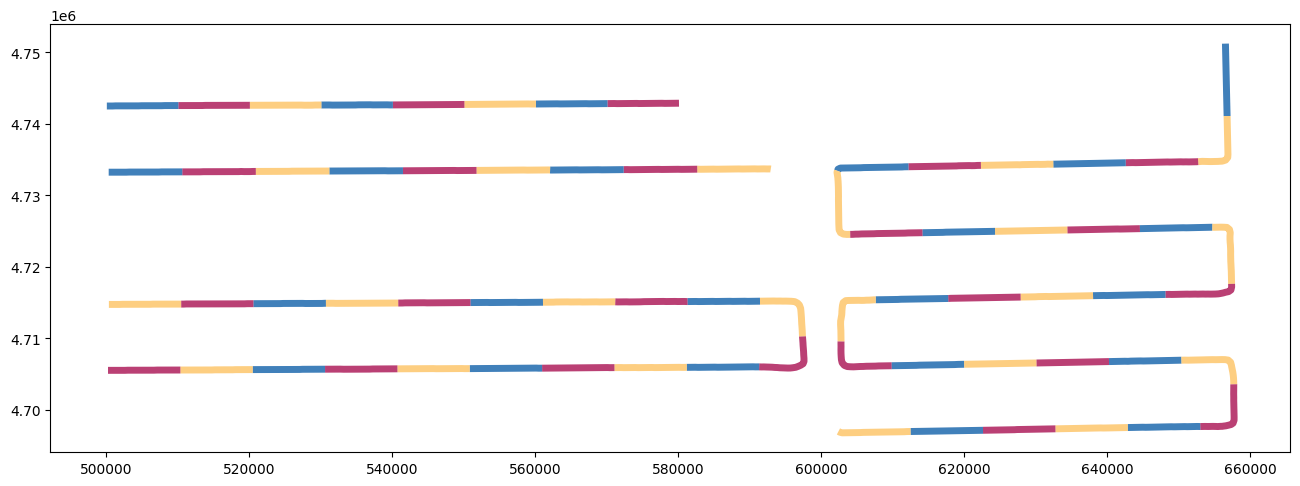

In [12]:
u_segments_redist.plot()  # plot the segments made with the redistribution variation

## Stage 3 - sampling

### Samples from DataPoints

In [13]:
## Stage 3: make samples from datapoints
u_samples_trackpoints = Samples.segment(
    datapoints=u_trackpoints,  # enter the DataPoints
    segments=u_segments_redist,  # enter the Segments
    cols={  # set the data columns to assign:
        'individuals': 'sum',  # - sum the number of individuals per segment
        'bss': 'mean'},        # - average the BSS per segment
    how='dfb')  # match by distance from the beginning of the section

In [14]:
u_samples_trackpoints.samples[:5]  # display the first five samples from DataPoints

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end,individuals,bss
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s001,0.000000,10000.580283,1.0,2.000000
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s001,10000.580283,20001.160565,0.0,2.000000
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s001,20001.160565,30001.740848,2.0,2.000000
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s001,30001.740848,40002.321130,5.0,2.846154
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s001,40002.321130,50002.901413,0.0,3.000000


### Samples of survey effort

In [15]:
## Stage 3: make samples of survey effort
u_samples_effort = Samples.segment_se(
    segments=u_segments_redist,  # Segments object
    length=True,  # measure effort as length
    esw=2000  # measure effort as area based on stripwidth of 2000 metres
)

In [16]:
u_samples_effort.samples[:5]  # display the first five samples of survey effort

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end,se_length,se_area
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s001,0.000000,10000.580283,10000.580283,4.000232e+07
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s001,10000.580283,20001.160565,10000.580283,4.000232e+07
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s001,20001.160565,30001.740848,10000.580283,4.000232e+07
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s001,30001.740848,40002.321130,10000.580283,4.000232e+07
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s001,40002.321130,50002.901413,10000.580283,4.000232e+07


### Samples - merge

In [17]:
## Stage 3: make final samples by merging samples from datapoints and samples of survey effort
u_samples = Samples.merge(
    trackpoints=u_samples_trackpoints,  # samples from datapoints
    effort=u_samples_effort)  # samples of survey effort
# Note: names of parameters (i.e., 'trackpoints' and 'effort') are arbitrary


Note: samples generated with the segment approach


In [18]:
u_samples.samples[:5]  # display the first five samples

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end,individuals,bss,se_length,se_area
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s001,0.000000,10000.580283,1.0,2.000000,10000.580283,4.000232e+07
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s001,10000.580283,20001.160565,0.0,2.000000,10000.580283,4.000232e+07
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s001,20001.160565,30001.740848,2.0,2.000000,10000.580283,4.000232e+07
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s001,30001.740848,40002.321130,5.0,2.846154,10000.580283,4.000232e+07
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s001,40002.321130,50002.901413,0.0,3.000000,10000.580283,4.000232e+07


### Additional processing

In [19]:
## Stage 3: additional processing
u_samples.reproject(crs_target='EPSG:4326')  # reproject to EPSG:4326
u_samples.coords()  # extract coordinates of the midpoints

Success: additional geometry column "midpoint" reprojected to CRS "EPSG:4326"
Success: reprojected to CRS "EPSG:4326"


In [20]:
u_samples.samples[:5]  # display the first five samples

,segment_id,line,midpoint,midpoint_lon,midpoint_lat,date,section_id,dfbsec_beg,dfbsec_end,individuals,bss,se_length,se_area
0,s01-r10000m,"LINESTRING (-68.02 42.83433, -68.02117 42.8343...",POINT (-68.08117 42.8345),-68.081173,42.834500,2019-01-25,s001,0.000000,10000.580283,1.0,2.000000,10000.580283,4.000232e+07
1,s02-r10000m,"LINESTRING (-68.14234 42.83483, -68.1445 42.83...",POINT (-68.20351 42.835),-68.203514,42.835000,2019-01-25,s001,10000.580283,20001.160565,0.0,2.000000,10000.580283,4.000232e+07
2,s03-r10000m,"LINESTRING (-68.26469 42.83517, -68.2675 42.83...",POINT (-68.32587 42.83533),-68.325867,42.835330,2019-01-25,s001,20001.160565,30001.740848,2.0,2.000000,10000.580283,4.000232e+07
3,s04-r10000m,"LINESTRING (-68.38705 42.83533, -68.39017 42.8...",POINT (-68.44823 42.83533),-68.448231,42.835330,2019-01-25,s001,30001.740848,40002.321130,5.0,2.846154,10000.580283,4.000232e+07
4,s05-r10000m,"LINESTRING (-68.50941 42.83533, -68.51417 42.8...",POINT (-68.57058 42.8356),-68.570584,42.835603,2019-01-25,s001,40002.321130,50002.901413,0.0,3.000000,10000.580283,4.000232e+07


### Save

In [21]:
## Stage 3: save the samples
u_samples.save(
    folder=export_folder,  # export folder
    filetype='csv'  # set filetype to CSV
)